# Econometric Methods WiSe 2023/2024 Home Assignment

## Group Members
* Josef Fella
* Robert Hennings

In [1]:
# Load the data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as st
path = r"/Users/Robert_Hennings/Dokumente/Uni/Master/3.Semester/Econometric Methods/Home Assignment/"
data_file = "HA_smoking.dta"
smoking_data = pd.read_stata(path + data_file)
print(f"Loaded data successfully with shape: {smoking_data.shape}")

Loaded data successfully with shape: (10000, 8)


## Exercise 1)

### a)
### Import and briefly describe the dataset.

In [2]:
smoking_data.head(20)

,smoker,smkban,age,hsdrop,hsgrad,colsome,colgrad,female
0,1,1,41,0,1,0,0,1
1,1,1,44,0,0,1,0,1
2,0,0,19,0,0,1,0,1
3,1,0,29,0,1,0,0,1
4,0,1,28,0,0,1,0,1
5,0,0,40,0,0,1,0,0
6,1,1,47,0,0,1,0,1
7,1,0,36,0,0,1,0,0
8,0,1,49,0,0,1,0,1
9,0,0,44,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   smoker     10000 non-null  int8 
 1   constant_  10000 non-null  int64
 2   smkban     10000 non-null  int8 
 3   age        10000 non-null  int8 
 4   age_sqrt   10000 non-null  int64
 5   hsdrop     10000 non-null  int8 
 6   hsgrad     10000 non-null  int8 
 7   colsome    10000 non-null  int8 
 8   colgrad    10000 non-null  int8 
 9   female     10000 non-null  int8 
dtypes: int64(2), int8(8)
memory usage: 312.5 KB


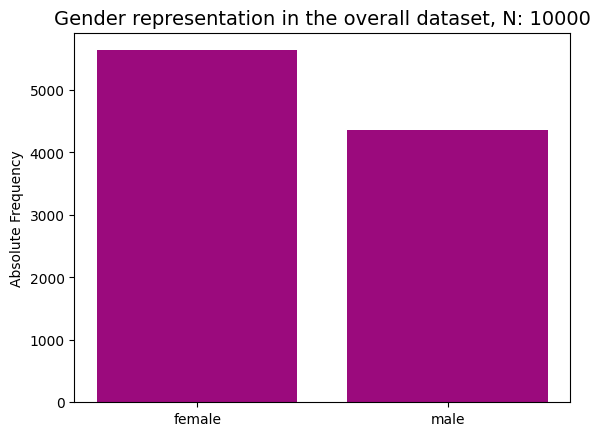

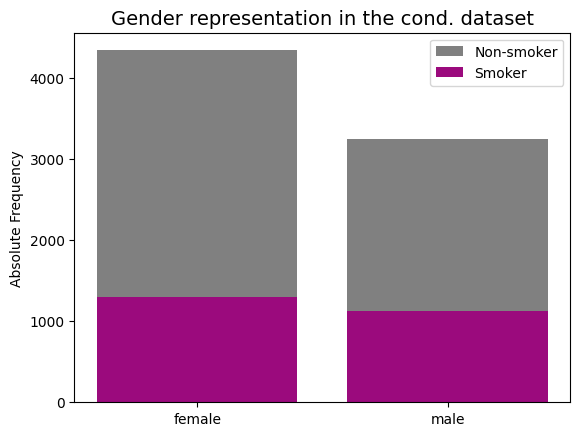

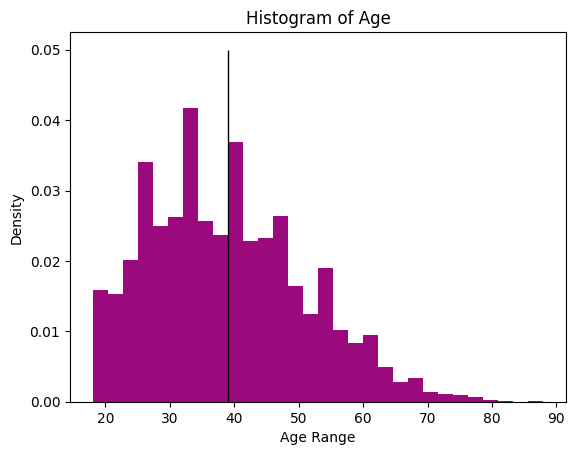

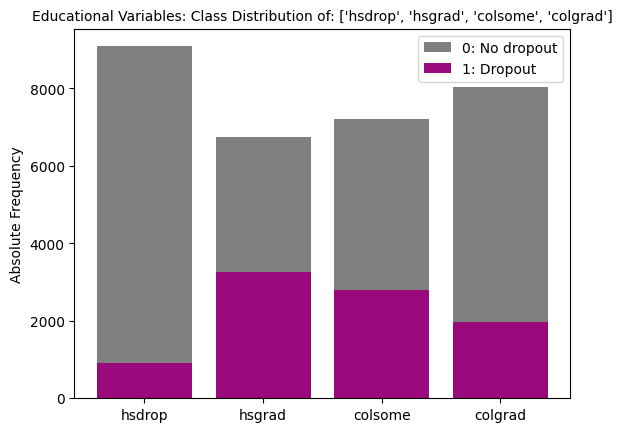

In [24]:
smoking_data.describe()
smoking_data.info()
smoking_data.isna().value_counts()

# Look at the different class distributions in the base dataset
# Genders in %
(smoking_data.female.value_counts() / smoking_data.shape[0]) * 100
# Gender representation seems to be quite 
plt.bar(x=["female", "male"], height=smoking_data.female.value_counts().to_list(), color="#9b0a7d")
plt.title(f"Gender representation in the overall dataset, N: {smoking_data.shape[0]}", fontsize=14)
plt.ylabel("Absolute Frequency")
plt.show()
# Gender distribution within the classes of smokers and non-smokers
plt.bar(x=["female", "male"], height=[smoking_data.query("smoker==0 and female==1").shape[0],
                                      smoking_data.query("smoker==0 and female==0").shape[0]],
                                    label="Non-smoker", color="grey")
plt.bar(x=["female", "male"], height=[smoking_data.query("smoker==1 and female==1").shape[0],
                                      smoking_data.query("smoker==1 and female==0").shape[0]],
                                    label="Smoker", color="#9b0a7d")
plt.title(f"Gender representation in the cond. dataset", fontsize=14)
plt.ylabel("Absolute Frequency")
plt.legend()
plt.show()
# Age distribution
(smoking_data.age.value_counts() / smoking_data.shape[0]) * 100
# Class distribution of age
plt.hist(smoking_data.age, bins=30, density=True, color="#9b0a7d")
plt.vlines(x=round(np.mean(smoking_data.age)), ymin=0, ymax= 0.050, color="black", linewidth=1)
plt.title("Histogram of Age")
plt.ylabel("Density")
plt.xlabel("Age Range")
plt.show()
# Looking at the educational variables
educ_df = pd.DataFrame()
for educ_var in smoking_data.columns[5:9]:
    educ_df[educ_var] = smoking_data[educ_var].value_counts()

# Class distribution
plt.bar(x=smoking_data.columns[5:9], height=educ_df.loc[0], color="grey", label="0: No dropout")
plt.bar(x=smoking_data.columns[5:9], height=educ_df.loc[1], color="#9b0a7d", label="1: Dropout")
plt.title(f"Educational Variables: Class Distribution of: {smoking_data.columns[5:9].to_list()}", fontsize=10)
plt.ylabel("Absolute Frequency")
plt.legend()
plt.show()

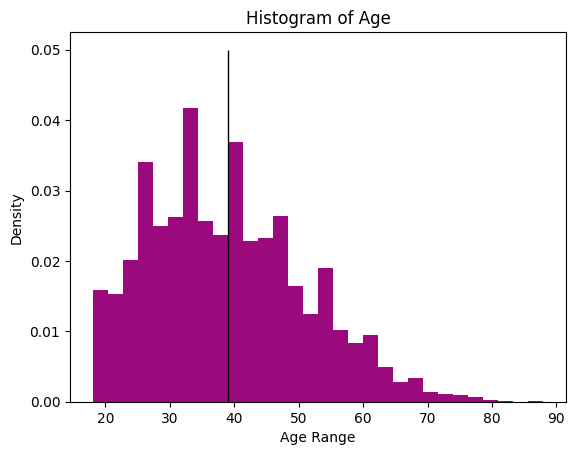

In [4]:
# Class distribution of age
plt.hist(smoking_data.age, bins=30, density=True, color="#9b0a7d")
plt.vlines(x=round(np.mean(smoking_data.age)), ymin=0, ymax= 0.050, color="black", linewidth=1)
plt.title("Histogram of Age")
plt.ylabel("Density")
plt.xlabel("Age Range")
plt.show()

### b)
### Estimate the regression using the OLS method with heteroscedasticity
### robust standard errors. Interpret $\hat{\beta_{1}}$. Is it statistically significant?

In [5]:
# Estimate the model
# Add the age^2 variable
smoking_data.insert(3, "age_sqrt", smoking_data.age.apply(lambda x: np.power(x, 2)))
# use heteroscedasticity robust standard errors and add constant intercept
smoking_data.insert(1, "constant_", 1)

In [6]:
lin_reg = sm.regression.linear_model.OLS(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
lin_reg_fit = lin_reg.fit(cov_type="HC2")
print(lin_reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 smoker   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     80.51
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          1.35e-129
Time:                        15:45:09   Log-Likelihood:                -5449.7
No. Observations:               10000   AIC:                         1.092e+04
Df Residuals:                    9991   BIC:                         1.098e+04
Df Model:                           8                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant_     -0.0269      0.042     -0.647      0.5

### Interpret beta_hat_1
### beta_hat_1 captures the effect of an existing smoking ban at the work place
### Remember this variable was binary

In [8]:
print(round(lin_reg_fit.params["smkban"], 3))

-0.048


### H0: measures at the work place banning smoking have no effect on becoming a smoker, βˆ1 is equal to 0
### H1: measures indeed have an effect, βˆ1 != 0

### - If we look purely on the p-value of 0.000 we would argue that its statistically
### significant, since its below the significance level of 0.05 and even 0.01. So we
### have statistical evidence to reject our H0 (less smoking with smoking ban).
### - On the other hand the coefficient is -0.048052, so smoking measures in place
### at the work area decrease the predicted probability of being a smoker by 4.8052 %.
### In absolute terms this is a quiet small magnitude. Rendering the effect strength of the measures taken questionable.

### --> Statistically relevant BUT practical importance will be dependent of the study and scale of variable involved.

In [9]:
hypothesis_0 = "smkban = 0"
t_test_smkban = lin_reg_fit.t_test(hypothesis_0, use_t=True)
print(t_test_smkban)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0481      0.009     -5.349      0.000      -0.066      -0.030


### p-value: 0.000
### Since the p-value is < 0.05 and even <0.01 we have to reject the H0 Hypothesis
### that the estimated beta parameter for the variable smkban is 0 or insignificant

In [ ]:
z_score = ((0 - lin_reg_fit.params["smkban"]) / t_test_smkban.summary_frame()["std err"])
st.norm.pdf(z_score)
# Compare t value with critical value for test decision
abs(t_test_smkban.summary_frame()["t"])

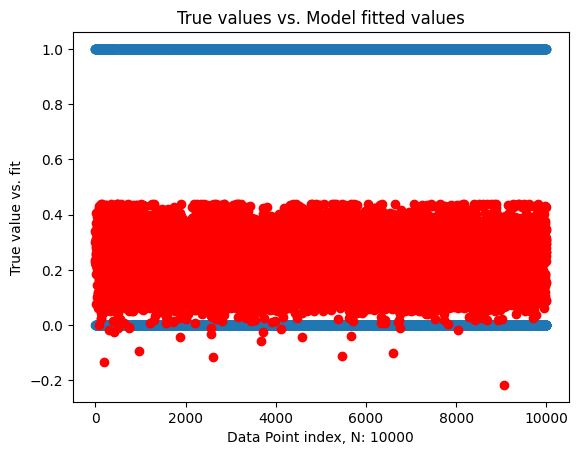

In [9]:
plt.plot(smoking_data.index, smoking_data.smoker, "o")
plt.plot(smoking_data.index, lin_reg_fit.fittedvalues, "ro")
plt.title("True values vs. Model fitted values", fontsize=12)
plt.xlabel(f"Data Point index, N: {smoking_data.shape[0]}")
plt.ylabel("True value vs. fit")
plt.show()

### c)
### Does the probability of smoking increase or decre- ase with the level of education?
### Observe the educational related variables: hsdrop, hsgrad, colsome, colgrad,

In [ ]:
print(lin_reg_fit.summary())

### Observing the educational related variables inlcuded in the model, one can see
### the following trend: 
### the higher the education of an individual the less likely or the smaller the chance
### that this individual is a smoker, but all estimated parameters are positive
### as high school drop outs have an effect of 0.2821909, high school grads: 0.2245546
### attended a college: 0.1556154 and finally college grads are least likely ending up
### as a smoker with: 0.0433244
### where the effect or absolute difference is biggest between attended college and
### the college grads, so finishing college is advised

### --> Model implies higher probability for hsfropouts than for graduates

In [12]:
print(abs(lin_reg_fit.params.diff()))

constant_         NaN
smkban       0.021180
age          0.057812
age_sqrt     0.009889
hsdrop       0.282320
hsgrad       0.057636
colsome      0.068939
colgrad      0.112291
female       0.075457
dtype: float64


### H0 Hypothesis: hsdrop and hsgrad have the same effect on smoker: hsdrop = hsgrad
### test if hsdrop and hsgrad have the same effect for the smoking probability
### Wald test

In [10]:
hypothesis_0 = ' = '.join(["hsdrop", "hsgrad"])
wald_test = lin_reg_fit.wald_test(hypothesis_0)
print(wald_test.statistic)

[[10.2478391]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


### chi2 statistic: 10.2478391
### p-value: 0.0013684480785456001
### - H0: hsdrop = hsgrad (they are equal)
### - H1: hsdrop, hsgrad have different effects

### - Result: We reject the H0 --> F = 10.25 and p-value 0.0014 (less than 0.05 and even 0.01)
### - So both variables are statistically significantly different from each other

### d)
### Predict with fitted model and interprete

In [ ]:
smkban_pred = 1
age_pred = 70
age_sqrt_pred = np.power(age_pred, 2)
hsdrop_pred, hsgrad_pred, colsome_pred = 0, 0, 0
colgrad_pred = 1
female_pred = 1

In [ ]:
# Keep the correct order
smoking_data[smoking_data.columns[1:]]

x_pred = [1, smkban_pred, age_pred, age_sqrt_pred, hsdrop_pred, hsgrad_pred, colsome_pred, colgrad_pred, female_pred]

y_pred = lin_reg_fit.predict(x_pred)
y_pred
# -0.01326874

### - smoking measures in place at the work area decrease the predicted probability
###   of being a smoker for this individual specified, by roughly 1.32 %

### Problems:
### - We only assume linear relationship of predictor and regressor
### - Especially the positvie coefficient of education may suggest a more complex relationship --> not     	considered here
### - Predicted probability isn't standardized -> Can yield values above 1 o below 0

In [14]:
# Linear probability model is not appropriate in this case
print(smoking_data.query("age >= 70"))
# 103 rows out of 10000 records
print(smoking_data.query("age >= 70 and smoker == 1").shape)

      smoker  constant_  smkban  age  age_sqrt  hsdrop  hsgrad  colsome  \
131        0          1       1   76      5776       0       0        1   
169        0          1       0   76      5776       1       0        0   
196        0          1       1   78      6084       0       0        0   
203        0          1       0   71      5041       0       1        0   
275        0          1       0   78      6084       0       1        0   
...      ...        ...     ...  ...       ...     ...     ...      ...   
9096       0          1       0   75      5625       0       1        0   
9204       0          1       0   74      5476       0       0        1   
9220       0          1       0   74      5476       0       1        0   
9288       0          1       1   73      5329       1       0        0   
9921       1          1       1   72      5184       0       1        0   

      colgrad  female  
131         0       1  
169         0       0  
196         0       1  
203

### 15 records ou of the >= 70s that smoke
### and only two are college grads
### So these given settings represent an extreme case where the trained linear model
### with its average effect might lead to insufficient accuracy 

# Execise 2)
### a)
### average partial effects of smoking ban on probability of smoking using i) probit and ii) logit model
### i) Probit Model

In [12]:
probit_mod = sm.Probit(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
probit_mod_fit = probit_mod.fit()
probit_mod_fit.summary()
# Average Partial Effect (APE)
probit_mod_ape = probit_mod_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban: -0.0485
print(probit_mod_ape.summary())
# 'dydx' - change in `endog` for a change in `exog`
# mkban: -0.0485

Optimization terminated successfully.
         Current function value: 0.526228
         Iterations 6
       Probit Marginal Effects       
Dep. Variable:                 smoker
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
smkban        -0.0485      0.009     -5.533      0.000      -0.066      -0.031
age            0.0104      0.002      4.979      0.000       0.006       0.015
age_sqrt      -0.0001    2.5e-05     -5.506      0.000      -0.000   -8.87e-05
hsdrop         0.3071      0.021     14.713      0.000       0.266       0.348
hsgrad         0.2597      0.018     14.567      0.000       0.225       0.295
colsome        0.1972      0.018     10.809      0.000       0.161       0.233
colgrad        0.0694      0.020      3.529      0.000       0.031       0.108
female        -0.0320      0.009   

### ii) Logit Model

In [13]:
logit_mod = sm.Logit(endog=smoking_data["smoker"], exog=smoking_data[smoking_data.columns[1:]])
logit_mod_fit = logit_mod.fit()
logit_mod_fit.summary()
# Average Partial Effect (APE)
logit_mod_ape = logit_mod_fit.get_margeff(at="mean", method="dydx", atexog="smkban")
# estimate: smkban: 0.2652
print(logit_mod_ape.summary())
# 'dydx' - change in `endog` for a change in `exog`
# mkban: -0.0464

Optimization terminated successfully.
         Current function value: 0.526216
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:                 smoker
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
smkban        -0.0464      0.009     -5.406      0.000      -0.063      -0.030
age            0.0104      0.002      4.992      0.000       0.006       0.014
age_sqrt      -0.0001    2.5e-05     -5.511      0.000      -0.000   -8.89e-05
hsdrop         0.3120      0.022     14.294      0.000       0.269       0.355
hsgrad         0.2676      0.019     13.787      0.000       0.230       0.306
colsome        0.2067      0.020     10.368      0.000       0.168       0.246
colgrad        0.0765      0.022      3.491      0.000       0.034       0.119
female        -0.0317      0.009   

### Effect statistically significant?

### Display the results side by side in a comparison table

In [14]:
param = "smkban"
lin_reg_eff = lin_reg_fit.params[param]
logit_eff = logit_mod_ape.summary_frame().loc[param, "dy/dx"]
probit_eff = probit_mod_ape.summary_frame().loc[param, "dy/dx"]

comp_eff_df = pd.DataFrame(index=["Linear Regression", "Logit Model", "Probit Model"],
                           data=[lin_reg_eff, logit_eff, probit_eff],
                           columns=["Average Partiial Effects (APE)"])
print(comp_eff_df)

                   Average Partiial Effects (APE)
Linear Regression                       -0.048052
Logit Model                             -0.046367
Probit Model                            -0.048487


# H0: The APE is not relevant, it should be 0
# H1: The APE is relevant and has an effect, it shoud be !=0

# Result: Since the p-value is 0.000 what is <0.05 and even 0.01, we reject the H0
# 		that the APE is not relevant, i.e. being equal to 0

# Interpretation: the estimated average change in the probability of being a smoker is reduced by 4.81%

### b)
### Probit Model to calculate the effect for groups specified
### Estimate the model new for the groups or predict for the groups?

### i) male, 40 years old, college graduate.

In [16]:
# Set the testing variables
constant = 1
smkban_i = 0
age_i = 40
age_sqrt_i = age_i**2
hsdrop_i = 0
hsgrad_i = 0
colsome_i = 0
colgrad_i = 1
female_i = 0

# Baseline Situation with no smoking ban in place
probit_mod_fit.get_prediction(exog=[constant, smkban_i, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).summary_frame()
base_i = probit_mod_fit.get_prediction(exog=[constant, smkban_i, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).predicted
# 0.18671

# Situation when a smoking ban is introduced
probit_mod_fit.get_prediction(exog=[constant, 1, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).summary_frame()
ban_i = probit_mod_fit.get_prediction(exog=[constant, 1, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).predicted
# 0.146843

# Effect strenth as difference
print(base_i - ban_i)
# 0.03986644

[0.03986644]


### ii) female, 20 years old, high school dropout.

In [17]:
# ii) female, 20 years old, high school dropout.
constant = 1
smkban_ii = 0
age_ii = 20
age_sqrt_ii = age_ii**2
hsdrop_ii = 1
hsgrad_ii = 0
colsome_ii = 0
colgrad_ii = 0
female_ii = 1

# Baseline Situation with no smoking ban in place
probit_mod_fit.get_prediction(exog=[constant, smkban_ii, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).summary_frame()
base_ii = probit_mod_fit.get_prediction(exog=[constant, smkban_ii, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).predicted
# 0.361454

# Situation when a smoking ban is introduced
probit_mod_fit.get_prediction(exog=[constant, 1, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).summary_frame()
ban_ii = probit_mod_fit.get_prediction(exog=[constant, 1, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).predicted
# 0.303431

# Effect strenth as difference
print(base_ii - ban_ii)
# 0.05802279

[0.05802279]


In [18]:
# For Male, 40, College Graduate
print(f"Predicted Probability of a male, 40 Years Old, College Graduate without Smoking Ban: {round(base_i[0], 3)}")
print(f"Predicted Probability of a male, 40 Years Old, College Graduate with Smoking Ban: {round(ban_i[0], 3)}")
print(f"Effect of Smoking Ban on Smoking Probability for Males: {round(base_i[0] - ban_i[0], 3)}")

# Explanation:
# Among 40-year-old males who are college graduates, the probability of smoking in the workplace
# without any measures taken is 18.67%. However, if a smoking ban is implemented, this probability decreases to
# 14.68%. Consequently, the smoking ban results in a reduction of smoking probability by 3.9% within this specific demographic group.


# For Female, 20, High School Dropout
print(f"Predicted Probability of a female, 20 Years Old, High School Dropout without Smoking Ban: {round(base_ii[0], 3)}")
print(f"Predicted Probability of a female, 20 Years Old, High School Dropouts with Smoking Ban: {round(ban_ii[0], 3)}")
print(f"Effect of Smoking Ban on Smoking Probability for Females: {round(base_ii[0] - ban_ii[0], 3)}")

# Explanation:
# For 20-year-old females who are high school dropouts, the lprobability of smoking in the workplace without any
# measures taken is 36.14%. If a smoking ban is implemented, this probability decreases to 30.34%. Consequently,
# the smoking ban results in a reduction of smoking probability by 5.8% within this specific demographic group.


# Final Comparison
base_i_df = probit_mod_fit.get_prediction(exog=[constant, smkban_i, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).summary_frame()
ban_i_df = probit_mod_fit.get_prediction(exog=[constant, 1, age_i, age_sqrt_i, hsdrop_i, hsgrad_i, colsome_i, colgrad_i, female_i]).summary_frame()
i_df = pd.concat([base_i_df, ban_i_df]).reset_index(drop=True)
i_df["Effect_strength"] = i_df.predicted.diff()
print(i_df)

base_ii_df = probit_mod_fit.get_prediction(exog=[constant, smkban_ii, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).summary_frame()
ban_ii_df = probit_mod_fit.get_prediction(exog=[constant, 1, age_ii, age_sqrt_ii, hsdrop_ii, hsgrad_ii, colsome_ii, colgrad_ii, female_ii]).summary_frame()

ii_df = pd.concat([base_ii_df, ban_ii_df]).reset_index(drop=True)
ii_df["Effect_strength"] = ii_df.predicted.diff()
print(ii_df)

Predicted Probability of a male, 40 Years Old, College Graduate without Smoking Ban: 0.187
Predicted Probability of a male, 40 Years Old, College Graduate with Smoking Ban: 0.147
Effect of Smoking Ban on Smoking Probability for Males: 0.04
Predicted Probability of a female, 20 Years Old, High School Dropout without Smoking Ban: 0.361
Predicted Probability of a female, 20 Years Old, High School Dropouts with Smoking Ban: 0.303
Effect of Smoking Ban on Smoking Probability for Females: 0.058
   predicted        se  ci_lower  ci_upper  Effect_strength
0   0.186710  0.011672  0.164705  0.210446              NaN
1   0.146843  0.009470  0.129065  0.166193        -0.039866
   predicted        se  ci_lower  ci_upper  Effect_strength
0   0.361454  0.021449  0.320326  0.404250              NaN
1   0.303431  0.020233  0.264993  0.344178        -0.058023
